In [26]:
import os
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from plot_settings import define_plot_settings

project_dir = os.path.abspath('..')
print(f"Project directory: {project_dir}")
sys.path.append(os.path.join(project_dir))

Project directory: /work3/mtaho/PhD/DeepLearning/DeepLearning_PAINN


### Benchmark results (from PaiNN paper)

Here, the benchmark results from the PaiNN paper are restated:

In [27]:
test_mae_benchmark = np.array([[0.012, 0.045, 27.6, 20.4, 45.7, 0.066, 1.28, 5.85, 5.83, 5.98, 7.35, 0.024]])
target_names = ['mu', 'alpha', 'eps_HOMO', 'eps_LUMO', 'deps', 'R2', 'ZPVE', 'U0', 'U', 'H', 'G','cv']
df = pd.DataFrame(data=test_mae_benchmark, columns=target_names)
df.index=['Reference']

## Training history

Load training history data

In [ ]:
def load_all_results(parameter, values, relative_path):
    data = {}
    res_all = {}
    results_path = f"{project_dir}/{relative_path}"
    
    for val in values:
        for dirpath, dirnames, filenames in os.walk(results_path):
                
            if (f"{parameter}_{val}") in dirpath: 

                for file in sorted(filenames):

                    if ".pickle" in file:

                        with open(f"{dirpath}/{file}", 'rb') as pf:
                            p = pickle.load(pf)
                            res = p

                        res[parameter] = val

                        res_all[f"{parameter}_{val}"] = res
    return res_all    

relative_path = 'runs/train/2024-11-25'
parameter = 'target'
values = [6, 9]
res_all = load_all_results(parameter, values, relative_path)

print(res_all.keys())
res_all['target_6'].keys()

dict_keys(['target_6'])


dict_keys(['train_loss', 'val_loss', 'train_MAE', 'val_MAE', 'lr', 'epoch', 'test_MAE', 'target'])

Print table to compare with benchmark

In [29]:
test_MAEs = [res_all[res]['test_MAE'][0] for res in res_all]
targets = [target_names[res_all[res]['target']] for res in res_all]

In [30]:
new_row = dict(zip(targets, test_MAEs))
df = pd.concat([df, pd.DataFrame([new_row])])

Compute relative error and add to dataframe:

In [31]:
relative_errors = (df.iloc[1] - df.iloc[0])/df.iloc[0]
df = pd.concat([df, pd.DataFrame([relative_errors])])
df = pd.DataFrame(df)

In [32]:
df.index = ['Reference', 'Predicted', 'Relative Error']
df.fillna('-', inplace=False)

,mu,alpha,eps_HOMO,eps_LUMO,deps,R2,ZPVE,U0,U,H,G,cv
Reference,0.012,0.045,27.6,20.4,45.7,0.066,1.280000,5.85,5.83,5.98,7.35,0.024
Predicted,-,-,-,-,-,-,1.398877,-,-,-,-,-
Relative Error,-,-,-,-,-,-,0.092872,-,-,-,-,-


Plot training progress and results

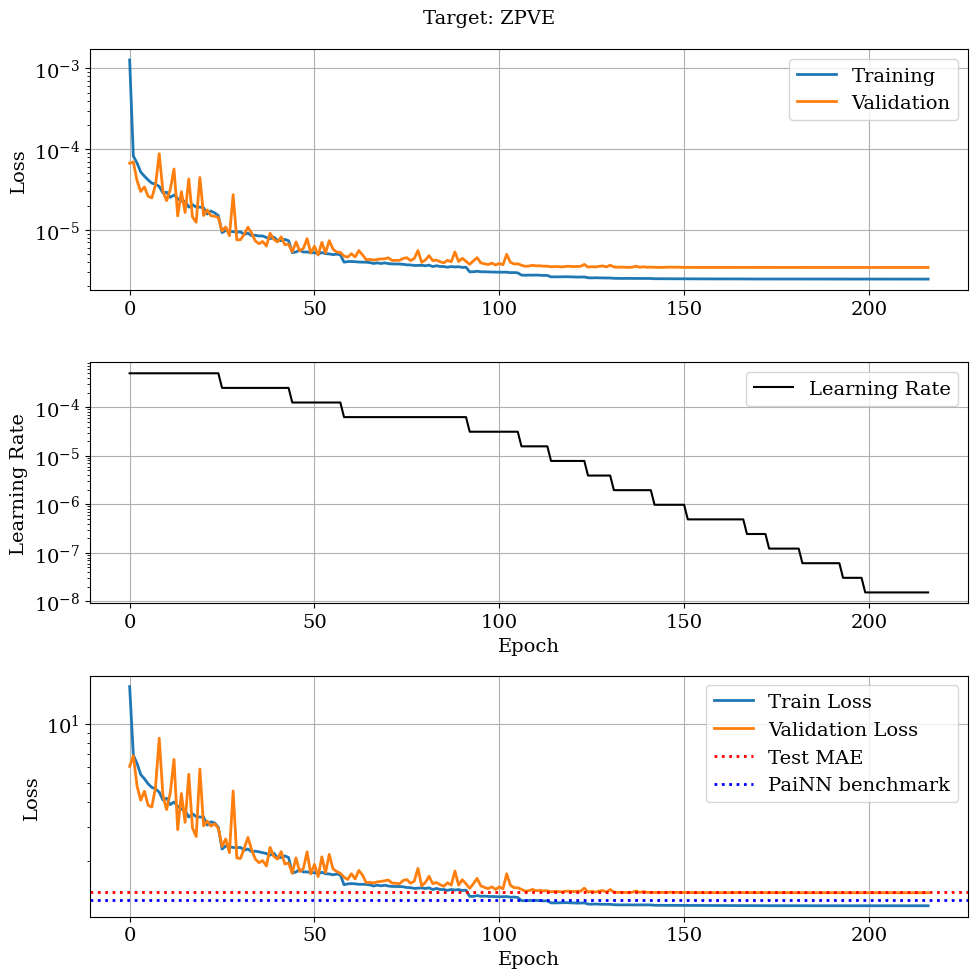

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), height_ratios=[1, 1.0, 1])

define_plot_settings(14)

def plot_training_progress(data):
    lw = 2.0
    # Plot primary y-axis (losses) on the first subplot
    ax1.semilogy(data['epoch'], data['train_loss'],'-', lw=lw, label='Training')
    ax1.semilogy(data['epoch'], data['val_loss'],'-', lw=lw, label='Validation')
    # ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(loc='upper right')  # Legend for the first y-axis
    ax1.grid(True)

    # Plot secondary y-axis (learning rate) on the second subplot
    ax2.semilogy(data['epoch'], data['lr'], 'k-', label='Learning Rate')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Learning Rate', color='k')
    ax2.tick_params(axis='y', labelcolor='k')
    ax2.legend(loc='upper right')  # Combine legends
    ax2.grid(True)

    target_name = target_names[data['target']]
    plt.suptitle(f"Target: {target_name}")
    fig.tight_layout()

    # Plot primary y-axis (losses) on the first subplot
    ax3.semilogy(data['epoch'], data['train_MAE'],'-', lw=lw, label='Train Loss')
    ax3.semilogy(data['epoch'], data['val_MAE'],'-', lw=lw, label='Validation Loss')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Loss')
        # Plot test MAE as a horizontal line
    test_mae = data['test_MAE'][0]  # Convert tensor to a scalar
    ax3.axhline(y=test_mae, color='r', linestyle=':', lw=lw, label='Test MAE')
    ax3.axhline(y=df[target_name]['Reference'], color='b', linestyle=':', lw=lw, label='PaiNN benchmark')
    ax3.legend(loc='upper right')  # Update legend to include Test MAE
    ax3.grid(True)
    fig.tight_layout()
    plt.show()

plot_training_progress(res_all['target_6'])

## Trained model 

Load trained model

In [34]:
from src.models import model_loader
checkpoint_path = f"{results_path}/model_checkpoint.pth"

painn, metadata = model_loader.load_checkpoint(checkpoint_path);

print(painn)
 

NameError: name 'results_path' is not defined